In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')

#cnr: CONTRAST TO NOISE RATIO, EFC:Overview of extension, SNR: Signal to Noise Ratio, 
#qi1: model-free quality index, fwhm:Full Width at Half Maximum, fber:fiber-track

In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,0,1,50002,1,50002,PITT,no_filename,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [19]:
df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=True)
df.head()

,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [20]:
#dropping null values
df=df.dropna()


In [21]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
DX_GROUP     0
anat_cnr     0
anat_efc     0
anat_fber    0
anat_fwhm    0
anat_qi1     0
anat_snr     0
dtype: int64


In [22]:
X = df.drop('DX_GROUP', axis=1).copy()
X.head()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [23]:
y = df['DX_GROUP'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DX_GROUP, dtype: int64

In [24]:
df.describe()

,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,1.518653,11.641527,2.079628,72.804971,3.558793,0.072209,48.185793
std,0.499879,5.612932,11.435278,155.033640,0.676312,0.052283,282.736653
min,1.000000,0.000015,-217.560433,-3.123743,2.533930,0.000451,0.001400
25%,1.000000,8.613273,0.755764,3.898699,3.088846,0.040015,12.262756
50%,2.000000,10.966648,1.675090,10.341742,3.401205,0.060916,15.601842
75%,2.000000,13.181021,3.197335,86.028008,3.831771,0.093534,21.528386
max,2.000000,51.691800,33.318370,1734.146859,5.938324,0.259048,5957.198529


In [25]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
DX_GROUP     0
anat_cnr     0
anat_efc     0
anat_fber    0
anat_fwhm    0
anat_qi1     0
anat_snr     0
dtype: int64


In [26]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

DX_GROUP : [1 2]
anat_cnr : [10.20153877  7.16570147  7.69814438 ...  3.41346894  7.83900677
 12.16929687]
anat_efc : [1.19466382 1.12675161 1.22621772 ... 1.35823764 1.75436261 2.81835195]
anat_fber : [16.22345825 10.4600076   9.72575046 ...  4.33569983 12.27005481
  9.27210712]
anat_fwhm : [3.8780004  4.28223801 3.88168429 ... 3.32455    3.23217    3.51019   ]
anat_qi1 : [0.15271098 0.16171559 0.17418572 ... 0.10948991 0.08396437 0.04430978]
anat_snr : [12.07245188  9.24115456  9.32346277 ...  4.93395956 16.4031739
 23.56598215]


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)



In [28]:
model=DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=14)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_pred,y_test)

0.56

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


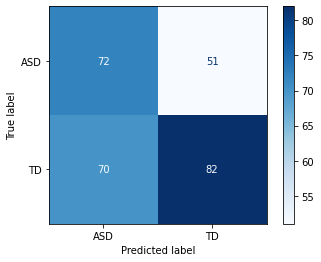

In [31]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["ASD","TD"], cmap="Blues")

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test, model.predict(X_test)))

print(accuracy_score(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.51      0.59      0.54       123
           2       0.62      0.54      0.58       152

    accuracy                           0.56       275
   macro avg       0.56      0.56      0.56       275
weighted avg       0.57      0.56      0.56       275

0.56
